In [0]:
#importing the database and basic dependancies
import numpy as np
import pandas as pd
#data base link :
#https://www.kaggle.com/rahulsah06/machine-learning-for-diabetes-with-python
data=pd.read_table("diabetes_data.csv",sep=",")

In [0]:
#creating a dataframe to host performance indicators for all the models (fill later)
comparison = pd.DataFrame(index = ["accuracy","error",'recall','AUC'])
#constructiong a function to evaluate a model's performance
from sklearn import metrics
def indicators(test,pred) :
  #confusion matrix
  c=pd.DataFrame(metrics.confusion_matrix(test,pred),index=['positives','negatives'],columns=['positives','negatives'])
  print("confusion matrix :\n" , c)
  #success rate = accuracy
  acc = metrics.accuracy_score(test,pred)
  print("accuracy : " , acc)
  err = 1.0 - acc
  print("error : " ,err)
  #recall
  se = metrics.recall_score(test,pred)
  print('recall : ' , se)
  metrics.roc_curve(test,pred)
  #AUC
  auc= metrics.roc_auc_score(test,pred)
  print ('AUC : ',auc)
  return([np.round(acc,3),np.round(err,3),np.round(se,3),np.round(auc,3)])

In [0]:
#individual roc curve
import matplotlib.pyplot as plt
def plot_roc_cur(fper, tper, fper2, tper2):
    plt.plot(fper2, tper2, color='blue', label='train')
    plt.plot(fper, tper, color='orange', label='test')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# **Explorative analysis**

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<BarContainer object of 2 artists>

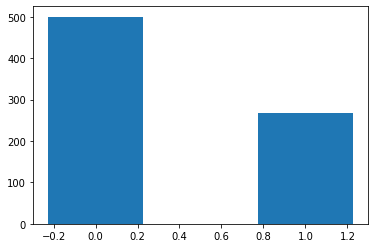

In [9]:
#bar plot
import matplotlib.pyplot as plt
y=data['Outcome']
plt.bar([0,1],[len(y[y==0]),len(y[y==1])],width=0.45)


In [10]:
print("percentage of non diabetics : ",np.round(len(y[y==0])*100/768) , "%\npercentage of diabetics : ", np.round(len(y[y==1])*100/768),'%')

percentage of non diabetics :  65.0 %
percentage of diabetics :  35.0 %


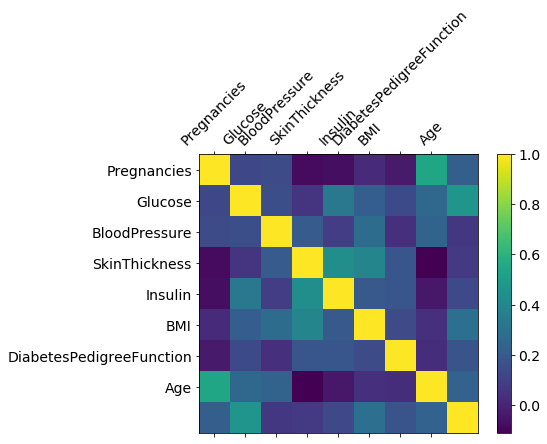

In [12]:
#correlogram
y=data['Outcome']
X=data.copy()
del X['Outcome']
import matplotlib.pyplot as plt
f = plt.figure(figsize=(7,5))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(X.shape[1]), X.columns, fontsize=14, rotation=45)
plt.yticks(range(X.shape[1]), X.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

# **Machine learning**

## **1. logistic regression**



In [103]:
#split train and test with stratification based on the dependent variable
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=data['Outcome'] , random_state = 147)

print(X_train.shape, '\n' , X_test.shape)

(576, 8) 
 (192, 8)


In a first model, we will use all the variables in the database.

In [104]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
reg_model = lr.fit(X_train, y_train)
print(reg_model.intercept_ , "\n", reg_model.coef_)

[-5.5125383] 
 [[ 1.03641690e-01  2.37948218e-02 -1.60660356e-02  9.60720250e-04
  -4.74725175e-04  6.06466826e-02  5.13503898e-01  1.36356431e-02]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


plotting the decision boundary :

In [105]:
X_new = np.linspace(0, 900, 576*8).reshape(-8,8)
X_new.shape
y_proba = reg_model.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
print(decision_boundary)
m = np.mean(decision_boundary)

[7.81419579 8.00955068 8.20490558 8.40026047 8.59561537 8.79097026
 8.98632516 9.18168005]


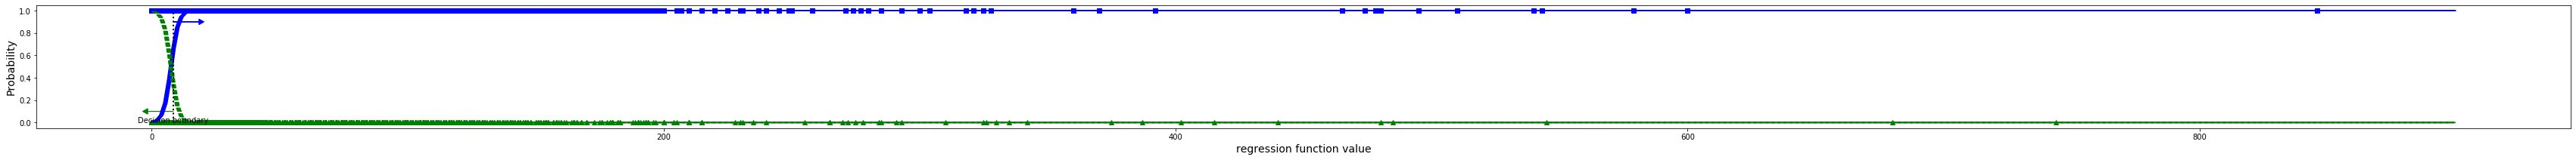

In [106]:
plt.figure(figsize=(60, 3))
plt.plot(X[y==0], y[y==0], "g^")
plt.plot(X[y==1], y[y==1], "bs")
plt.plot(X_new, y_proba[:, 1], "b-", label="Diabetic")
plt.plot(X_new, y_proba[:, 0], "g--", label="Not-diabetic")
plt.xlabel("regression function value", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.plot([m,m], [0,1], "k:", linewidth=2)
plt.text(m, 0, "Decision boundary", fontsize=10, color="k", ha="center")
plt.arrow(m, 0.1, -10, 0, head_width=0.05, head_length=2, fc='g', ec='g')
plt.arrow(m, 0.9, 10, 0, head_width=0.05, head_length=2, fc='b', ec='b')

performance indicators :

In [107]:
y_pred_reg_all = reg_model.predict(X_test)
indicators(y_test,y_pred_reg_all)
#comparison['log_reg_all']=

confusion matrix :
            positives  negatives
positives        114         11
negatives         30         37
accuracy :  0.7864583333333334
error :  0.21354166666666663
recall :  0.5522388059701493
AUC :  0.7321194029850747


[0.786, 0.214, 0.552, 0.732]

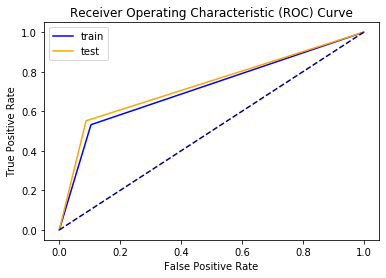

In [108]:
y_pred2 = reg_model.predict(X_train)
fper, tper, thresholds = metrics.roc_curve(y_test, y_pred_reg_all)
fper2, tper2 , thresholds2 =  metrics.roc_curve(y_train, y_pred2)
plot_roc_cur(fper,tper,fper2,tper2)

In a second model, we omit some variables based on the sickitLearn variable selection tool RFE.

In [109]:
from sklearn.feature_selection import RFE
selector = RFE(estimator=lr)
sol = selector.fit(X,y)
#number of selected variables
print(sol.n_features_)
print(sol.support_)
#order of omission
print(sol.ranking_)

4
[ True  True False False False  True  True False]
[1 1 2 4 5 1 1 3]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [110]:
#omitting the variables while keeping the original train and test sets intact
X_train_2 = X_train.copy()
X_test_2 = X_test.copy()
del X_train_2['BloodPressure']
del X_train_2['SkinThickness']
del X_train_2['Insulin']
del X_train_2['Age']
del X_test_2['BloodPressure']
del X_test_2['SkinThickness']
del X_test_2['Insulin']
del X_test_2['Age']
#new model
reg_model_2 = lr.fit(X_train_2, y_train)
print(reg_model_2.intercept_ , "\n", reg_model_2.coef_)


[-5.72777796] 
 [[0.11348095 0.0230708  0.0479227  0.53268951]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [111]:
#new decision boundary
X_new = np.linspace(0, 200, 576*4).reshape(-4,4)
X_new.shape
y_proba = reg_model_2.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
print(decision_boundary)
m = np.mean(decision_boundary)
m

[7.98957881 8.07642206 8.16326531 8.25010855]


8.119843682153713

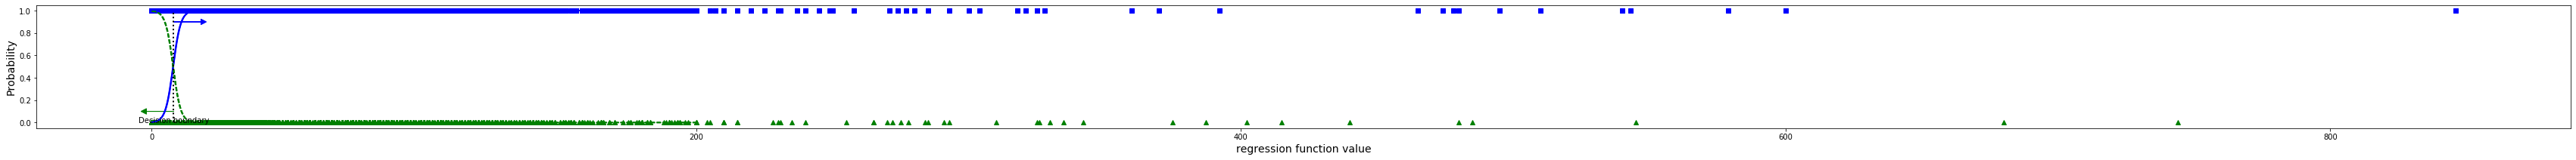

In [112]:
plt.figure(figsize=(60, 3))
plt.plot(X[y==0], y[y==0], "g^")
plt.plot(X[y==1], y[y==1], "bs")
plt.plot(X_new, y_proba[:, 1], "b-", label="Diabetic")
plt.plot(X_new, y_proba[:, 0], "g--", label="Not-diabetic")
plt.xlabel("regression function value", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.plot([m,m], [0,1], "k:", linewidth=2)
plt.text(m, 0, "Decision boundary", fontsize=10, color="k", ha="center")
plt.arrow(m, 0.1, -10, 0, head_width=0.05, head_length=2, fc='g', ec='g')
plt.arrow(m, 0.9, 10, 0, head_width=0.05, head_length=2, fc='b', ec='b')

Performance :

In [113]:
y_pred_reg_rfe = reg_model_2.predict(X_test_2)
indicators(y_test,y_pred_reg_rfe)
#note : it did not improve

confusion matrix :
            positives  negatives
positives        116          9
negatives         32         35
accuracy :  0.7864583333333334
error :  0.21354166666666663
recall :  0.5223880597014925
AUC :  0.7251940298507463


[0.786, 0.214, 0.522, 0.725]

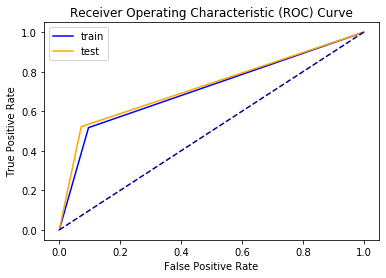

In [114]:
#roc curve
y_pred2 = reg_model_2.predict(X_train_2)
fper, tper, thresholds = metrics.roc_curve(y_test, y_pred_reg_rfe)
fper2, tper2 , thresholds2 =  metrics.roc_curve(y_train, y_pred2)
plot_roc_cur(fper,tper,fper2,tper2)

In this part, we omit some variables based on principal component analysis.

In [115]:
#omitting the variables while keeping the original train and test sets intact
X_train_3 = X_train.copy()
X_test_3 = X_test.copy()
del X_train_3['Pregnancies']
del X_train_3['BloodPressure']
del X_train_3['DiabetesPedigreeFunction']
del X_train_3['Insulin']
del X_test_3['Pregnancies']
del X_test_3['BloodPressure']
del X_test_3['DiabetesPedigreeFunction']
del X_test_3['Insulin']

reg_model_3 = lr.fit(X_train_3, y_train)
print(reg_model_3.intercept_ , "\n", reg_model_3.coef_)

[-5.76741623] 
 [[ 0.02191756 -0.00276633  0.05322248  0.02279493]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [116]:
X_new = np.linspace(0, 200, 576*4).reshape(-4,4)
X_new.shape
y_proba = reg_model_3.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
print(decision_boundary)
m = np.mean(decision_boundary)
m

[60.79027356 60.8771168  60.96396005 61.0508033 ]


60.920538428137206

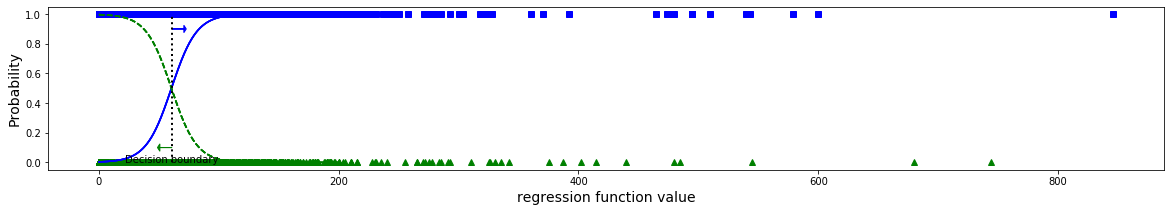

In [117]:
plt.figure(figsize=(20, 3))
plt.plot(X[y==0], y[y==0], "g^")
plt.plot(X[y==1], y[y==1], "bs")
plt.plot(X_new, y_proba[:, 1], "b-", label="Diabetic")
plt.plot(X_new, y_proba[:, 0], "g--", label="Not-diabetic")
plt.xlabel("regression function value", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.plot([m,m], [0,1], "k:", linewidth=2)
plt.text(m, 0, "Decision boundary", fontsize=10, color="k", ha="center")
plt.arrow(m, 0.1, -10, 0, head_width=0.05, head_length=2, fc='g', ec='g')
plt.arrow(m, 0.9, 10, 0, head_width=0.05, head_length=2, fc='b', ec='b')

In [118]:
y_pred_reg_pca = reg_model_3.predict(X_test_3)
comparison['reg_pca']=indicators(y_test,y_pred_reg_pca)
#note : it improved

confusion matrix :
            positives  negatives
positives        116          9
negatives         31         36
accuracy :  0.7916666666666666
error :  0.20833333333333337
recall :  0.5373134328358209
AUC :  0.7326567164179105


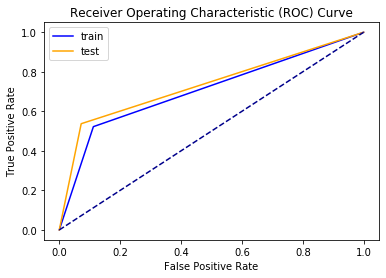

In [119]:
#roc curve
y_pred2 = reg_model_2.predict(X_train_3)
fper, tper, thresholds = metrics.roc_curve(y_test, y_pred_reg_pca)
fper2, tper2 , thresholds2 =  metrics.roc_curve(y_train, y_pred2)
plot_roc_cur(fper,tper,fper2,tper2)

So far, selecting variables based on PCA returned the best results, so we will use the same set of variables in further analysis.

## **2. support vector machine**

Let's begin by fitting a model with the default parameters. Note that scaling the data beforehand is important because unlike other algorithms, SVM is sensitive to deviations in the data, which can lead to unreliable results.
In a first step, we will use all the variables in the dataset.


In [120]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#SVM model
from sklearn.svm import SVC
svm_model = SVC() #using the RBF kernel by default
print(svm_model) #print default parameters
svm_model.fit(X_scaled,y_train)
y_pred_svm_all = svm_model.predict(X_test_scaled)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [121]:
comparison['svm_all_var'] = indicators(y_test,y_pred_svm_all)

confusion matrix :
            positives  negatives
positives        115         10
negatives         25         42
accuracy :  0.8177083333333334
error :  0.18229166666666663
recall :  0.6268656716417911
AUC :  0.7734328358208956


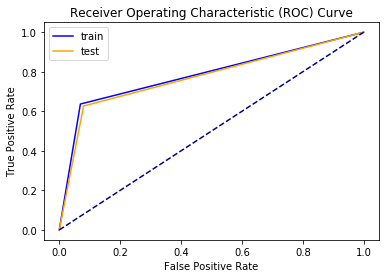

In [122]:
y_pred2 = svm_model.predict(X_scaled)
fper, tper, thresholds = metrics.roc_curve(y_test, y_pred_svm_all)
fper2, tper2 , thresholds2 =  metrics.roc_curve(y_train, y_pred2)
plot_roc_cur(fper, tper,fper2, tper2)

Let's check if selecting variables by PCA will improve the model :

In [0]:
#scaling the data, again
X_scaled_pca = scaler.fit_transform(X_train_3)
X_test_scaled_pca = scaler.fit_transform(X_test_3)

#SVM model
from sklearn.svm import SVC
svm_model_pca = SVC() #using the RBF kernel by default
svm_model_pca.fit(X_scaled_pca,y_train)
y_pred_svm_pca = svm_model_pca.predict(X_test_scaled_pca)

In [124]:
indicators(y_test,y_pred_svm_pca)
#note : it did not.

confusion matrix :
            positives  negatives
positives        116          9
negatives         26         41
accuracy :  0.8177083333333334
error :  0.18229166666666663
recall :  0.6119402985074627
AUC :  0.7699701492537313


[0.818, 0.182, 0.612, 0.77]

Let's try the RFE tool :
(note : only works with linear kernel)

In [125]:
selector = RFE(estimator = SVC(kernel='linear'))
sol = selector.fit(scaler.fit_transform(X),y)
#number of selected variables
print(sol.n_features_)
print(sol.support_)
#order of omission
print(sol.ranking_)

4
[ True  True False False False  True  True False]
[1 1 2 3 5 1 1 4]


In [126]:
svm_model_rfe = SVC(kernel = 'linear')
svm_model_rfe.fit(scaler.fit_transform(X_train_2),y_train)
y_pred_svm_rfe = svm_model_rfe.predict(scaler.fit_transform(X_test_2))
indicators(y_test,y_pred_svm_rfe)
#note : it did not improve

confusion matrix :
            positives  negatives
positives        114         11
negatives         32         35
accuracy :  0.7760416666666666
error :  0.22395833333333337
recall :  0.5223880597014925
AUC :  0.7171940298507463


[0.776, 0.224, 0.522, 0.717]

Let's improve the classification by grid search :

In [127]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C':[0.01,0.1,1.0,10],'gamma':[0.01,0.1,1,10,'auto']}]
grid = GridSearchCV(estimator=svm_model, param_grid=parameters, scoring='accuracy')
grid_ha = grid.fit(X,y)
print(pd.DataFrame.from_dict(grid_ha.cv_results_).loc[:,["params","mean_test_score"]]) 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


                          params  mean_test_score
0     {'C': 0.01, 'gamma': 0.01}         0.651042
1      {'C': 0.01, 'gamma': 0.1}         0.651042
2        {'C': 0.01, 'gamma': 1}         0.651042
3       {'C': 0.01, 'gamma': 10}         0.651042
4   {'C': 0.01, 'gamma': 'auto'}         0.651042
5      {'C': 0.1, 'gamma': 0.01}         0.651042
6       {'C': 0.1, 'gamma': 0.1}         0.651042
7         {'C': 0.1, 'gamma': 1}         0.651042
8        {'C': 0.1, 'gamma': 10}         0.651042
9    {'C': 0.1, 'gamma': 'auto'}         0.651042
10     {'C': 1.0, 'gamma': 0.01}         0.665365
11      {'C': 1.0, 'gamma': 0.1}         0.651042
12        {'C': 1.0, 'gamma': 1}         0.651042
13       {'C': 1.0, 'gamma': 10}         0.651042
14   {'C': 1.0, 'gamma': 'auto'}         0.651042
15      {'C': 10, 'gamma': 0.01}         0.635417
16       {'C': 10, 'gamma': 0.1}         0.651042
17         {'C': 10, 'gamma': 1}         0.651042
18        {'C': 10, 'gamma': 10}         0.651042


In [128]:
print(grid_ha.best_params_)
print(grid_ha.best_score_) 

{'C': 1.0, 'gamma': 0.01}
0.6653645833333334


In [129]:
grid_ha.fit(X_scaled ,y_train)
y_pred_svm_all_grid = grid_ha.predict(X_test_scaled)
indicators(y_test,y_pred_svm_all_grid)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


confusion matrix :
            positives  negatives
positives        117          8
negatives         30         37
accuracy :  0.8020833333333334
error :  0.19791666666666663
recall :  0.5522388059701493
AUC :  0.7441194029850746


[0.802, 0.198, 0.552, 0.744]

Grid search for the PCA based model :

In [130]:
grid = GridSearchCV(estimator=svm_model_pca, param_grid=parameters, scoring='accuracy')
grid_ha_pca = grid.fit(X,y)
print(pd.DataFrame.from_dict(grid_ha_pca.cv_results_).loc[:,["params","mean_test_score"]]) 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


                          params  mean_test_score
0     {'C': 0.01, 'gamma': 0.01}         0.651042
1      {'C': 0.01, 'gamma': 0.1}         0.651042
2        {'C': 0.01, 'gamma': 1}         0.651042
3       {'C': 0.01, 'gamma': 10}         0.651042
4   {'C': 0.01, 'gamma': 'auto'}         0.651042
5      {'C': 0.1, 'gamma': 0.01}         0.651042
6       {'C': 0.1, 'gamma': 0.1}         0.651042
7         {'C': 0.1, 'gamma': 1}         0.651042
8        {'C': 0.1, 'gamma': 10}         0.651042
9    {'C': 0.1, 'gamma': 'auto'}         0.651042
10     {'C': 1.0, 'gamma': 0.01}         0.665365
11      {'C': 1.0, 'gamma': 0.1}         0.651042
12        {'C': 1.0, 'gamma': 1}         0.651042
13       {'C': 1.0, 'gamma': 10}         0.651042
14   {'C': 1.0, 'gamma': 'auto'}         0.651042
15      {'C': 10, 'gamma': 0.01}         0.635417
16       {'C': 10, 'gamma': 0.1}         0.651042
17         {'C': 10, 'gamma': 1}         0.651042
18        {'C': 10, 'gamma': 10}         0.651042


In [131]:
print(grid_ha_pca.best_params_)
print(grid_ha_pca.best_score_)

{'C': 1.0, 'gamma': 0.01}
0.6653645833333334


In [132]:
grid_ha_pca.fit(X_scaled_pca ,y_train)
y_pred_svm_pca_grid = grid_ha_pca.predict(X_test_scaled_pca)
indicators(y_test,y_pred_svm_pca_grid)
#note : it did not improve
#note : grid search did not run for the rfe variable selection.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


confusion matrix :
            positives  negatives
positives        117          8
negatives         28         39
accuracy :  0.8125
error :  0.1875
recall :  0.582089552238806
AUC :  0.759044776119403


[0.812, 0.188, 0.582, 0.759]

Conclusion : the best SVM was the one that used all the variables in the dataset with default parameters.

## **3. decision tree**

In a first model, we take the default max_depth.




In [133]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(min_samples_leaf=20,min_impurity_decrease=0.01)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

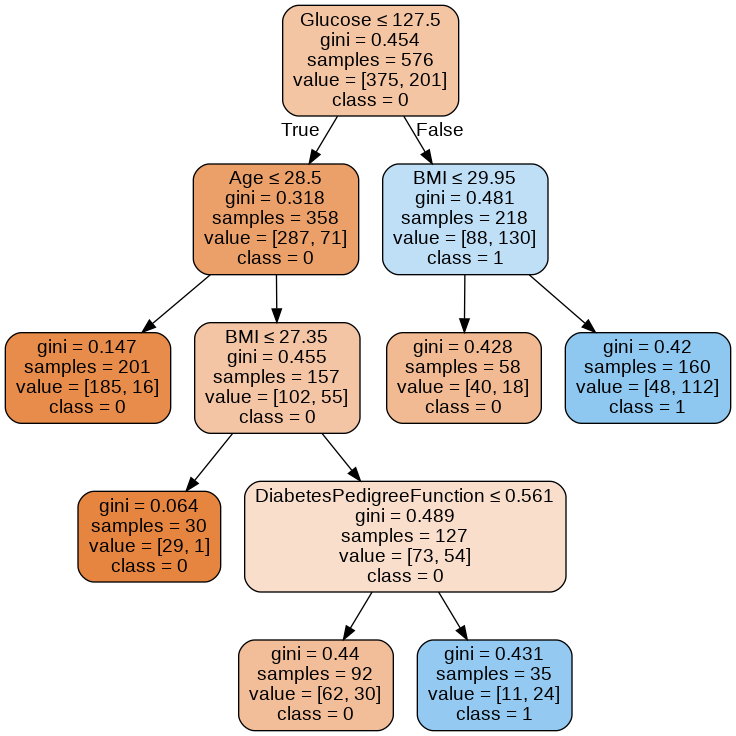

In [134]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree_1.png')
Image(graph.create_png())


In [135]:
#evaluate
y_pred_tree_1 = tree_clf.predict(X_test)
comparison['decision_tree_default'] = indicators(y_test,y_pred_tree_1)

confusion matrix :
            positives  negatives
positives        109         16
negatives         24         43
accuracy :  0.7916666666666666
error :  0.20833333333333337
recall :  0.6417910447761194
AUC :  0.7568955223880597


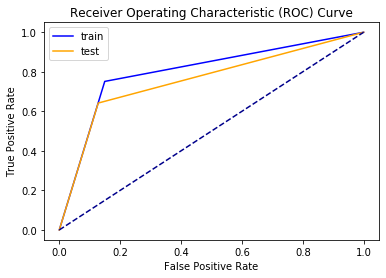

In [136]:
#roc curve
y_pred2 = tree_clf_2.predict(X_train)
fper, tper, thresholds = metrics.roc_curve(y_test, y_pred_tree_1)
fper2, tper2 , thresholds2 =  metrics.roc_curve(y_train, y_pred2)
plot_roc_cur(fper, tper,fper2, tper2)

Selecting the best variable set by the RFE tool :

In [137]:
selector = RFE(estimator = DecisionTreeClassifier())
sol = selector.fit(X,y)
#number of selected variables
print(sol.n_features_)
print(sol.support_)
#order of omission
print(sol.ranking_)

4
[False  True False False False  True  True  True]
[3 1 2 5 4 1 1 1]


In [0]:
X_train_tree = X_train.copy()
X_test_tree = X_test.copy()
X_tree = X.copy()
del X_train_tree ['Pregnancies']
del X_train_tree ['BloodPressure']
del X_train_tree ['SkinThickness']
del X_train_tree ['Insulin']
del X_test_tree ['Insulin']
del X_test_tree ['Pregnancies']
del X_test_tree ['BloodPressure']
del X_test_tree ['SkinThickness']
del X_tree ['Pregnancies']
del X_tree ['BloodPressure']
del X_tree ['SkinThickness']
del X_tree ['Insulin']

Let's select the best depth by grid search :

Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best: 0.804572 using {'max_depth': 5}
0.692414 (0.082025) with: {'max_depth': 1}
0.759377 (0.083756) with: {'max_depth': 2}
0.790996 (0.097199) with: {'max_depth': 3}
0.801362 (0.091963) with: {'max_depth': 4}
0.804572 (0.081801) with: {'max_depth': 5}
0.777226 (0.067679) with: {'max_depth': 6}
0.746915 (0.072188) with: {'max_depth': 7}
0.736919 (0.098307) with: {'max_depth': 8}
0.722263 (0.069823) with: {'max_depth': 9}
0.709503 (0.090463) with: {'max_depth': 10}


[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0, 0.5, 'AUC')

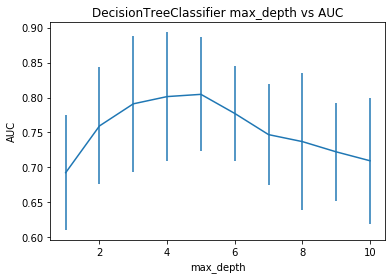

In [139]:
#optimal depth
model = DecisionTreeClassifier()
max_depth = range(1, 11)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=20, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_tree,y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(max_depth, means, yerr=stds)
plt.title("DecisionTreeClassifier max_depth vs AUC")
plt.xlabel('max_depth')
plt.ylabel('AUC')


Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best: 0.764323 using {'max_depth': 6}
0.722656 (0.069147) with: {'max_depth': 1}
0.752604 (0.064016) with: {'max_depth': 2}
0.746094 (0.065066) with: {'max_depth': 3}
0.726562 (0.051722) with: {'max_depth': 4}
0.760417 (0.054037) with: {'max_depth': 5}
0.764323 (0.060489) with: {'max_depth': 6}
0.730469 (0.057145) with: {'max_depth': 7}
0.712240 (0.063512) with: {'max_depth': 8}
0.720052 (0.063298) with: {'max_depth': 9}
0.712240 (0.083828) with: {'max_depth': 10}


[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0, 0.5, 'accuracy')

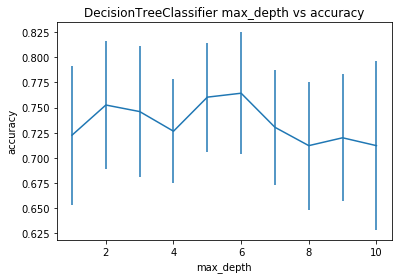

In [140]:
#optimal depth
model = DecisionTreeClassifier()
max_depth = range(1, 11)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=20, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_tree,y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(max_depth, means, yerr=stds)
plt.title("DecisionTreeClassifier max_depth vs accuracy")
plt.xlabel('max_depth')
plt.ylabel('accuracy')


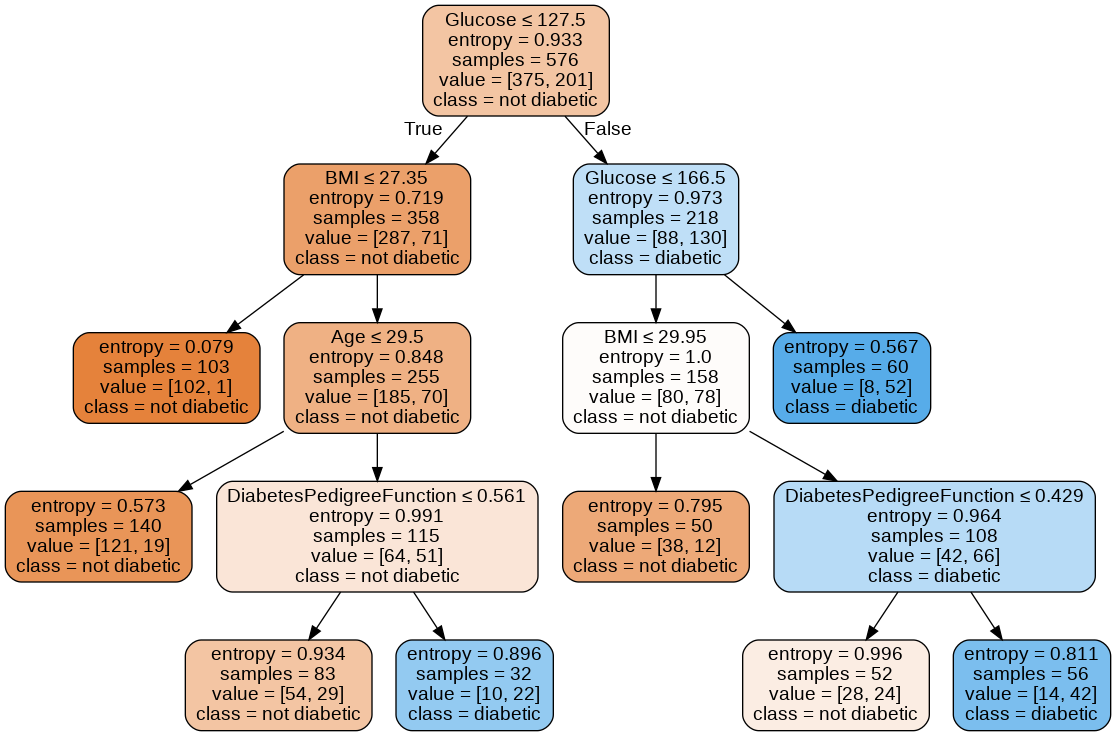

In [141]:
#optimized tree
tree_clf_optimized = DecisionTreeClassifier(max_depth=5,criterion='entropy',splitter='best', min_impurity_decrease=0.01,min_samples_leaf=20)
tree_clf_optimized.fit(X_train_tree,y_train)
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree_clf_optimized, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_tree.columns,class_names=['not diabetic','diabetic'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree_optimized.png')
Image(graph.create_png())

In [142]:
#evaluating the tree
y_pred_tree_2 = tree_clf_optimized.predict(X_test_tree)
indicators(y_test,y_pred_tree_2)

confusion matrix :
            positives  negatives
positives        112         13
negatives         37         30
accuracy :  0.7395833333333334
error :  0.26041666666666663
recall :  0.44776119402985076
AUC :  0.6718805970149254


[0.74, 0.26, 0.448, 0.672]





## **4. random forest**




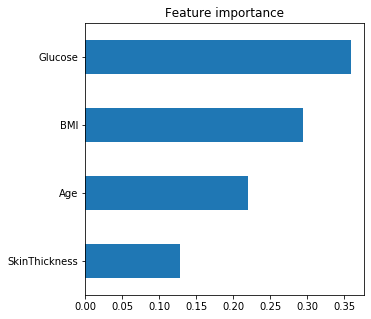

In [143]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 100 decision trees
rf_clf = RandomForestClassifier(n_estimators = 100, max_depth=16)
rf_clf.fit(X_train_3, y_train)
pd.Series(rf_clf.feature_importances_, index = X_train_3.columns).nlargest(12).plot(kind='barh',figsize=(5,5),title = 'Feature importance').invert_yaxis()

In [144]:
pred = rf_clf.predict(X_test_3)
indicators(y_test,pred)

confusion matrix :
            positives  negatives
positives        110         15
negatives         30         37
accuracy :  0.765625
error :  0.234375
recall :  0.5522388059701493
AUC :  0.7161194029850746


[0.766, 0.234, 0.552, 0.716]

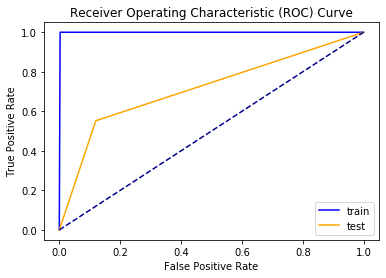

In [145]:
#roc curve
y_pred2 = rf_clf.predict(X_train_3)
fper, tper, thresholds = metrics.roc_curve(y_test, pred)
fper2, tper2 , thresholds2 =  metrics.roc_curve(y_train, y_pred2)
plot_roc_cur(fper, tper,fper2, tper2)

In [146]:
#variable selection by RFE
selector = RFE(estimator = RandomForestClassifier())
sol = selector.fit(X,y)
#number of selected variables
print(sol.n_features_)
print(sol.support_)
#order of omission
print(sol.ranking_)

4
[False  True False False False  True  True  True]
[2 1 3 5 4 1 1 1]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

let's try a bigger number of decision trees :

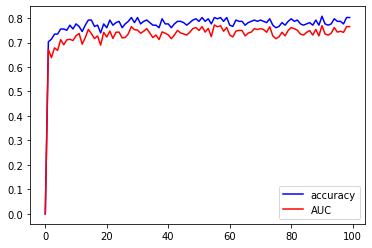

In [147]:
acc = np.zeros(100)
auc = np.zeros(100)
for n in range (1,100) :
  rf_clf = RandomForestClassifier(n_estimators = n, max_depth=16)
  rf_clf.fit(X_train_tree,y_train)
  pred = rf_clf.predict(X_test_tree)
  acc[n] = metrics.accuracy_score(y_test,pred)
  auc[n]= metrics.roc_auc_score(y_test,pred)

plt.plot(acc, 'b' , label = 'accuracy')
plt.plot(auc, 'r' , label = 'AUC')
plt.legend()
plt.show()


Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   34.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: -0.505047 using {'n_estimators': 190}


Text(0, 0.5, 'log loss')

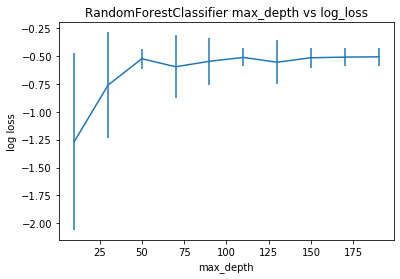

In [148]:
model = RandomForestClassifier()
max_depth = range(1, 16)
n_estimators = range (10,210,20)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=20, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_tree,y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("RandomForestClassifier max_depth vs log_loss")
plt.xlabel('max_depth')
plt.ylabel('log loss')

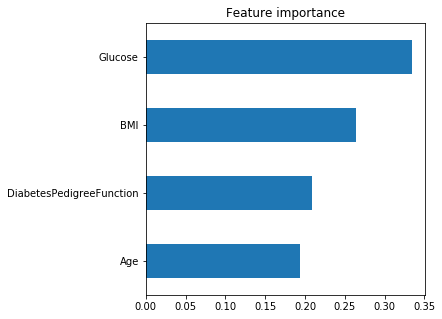

In [149]:
#optimized rf
rf_optimized = RandomForestClassifier(n_estimators=190,max_depth=16)
rf_optimized.fit(X_train_tree, y_train)
pd.Series(rf_optimized.feature_importances_, index = X_train_tree.columns).nlargest(12).plot(kind='barh',figsize=(5,5),title = 'Feature importance').invert_yaxis()

In [150]:
y_pred_rf_2 = rf_optimized.predict(X_test_tree)
comparison['random_forest'] = indicators(y_test,y_pred_rf_2)

confusion matrix :
            positives  negatives
positives        111         14
negatives         25         42
accuracy :  0.796875
error :  0.203125
recall :  0.6268656716417911
AUC :  0.7574328358208955


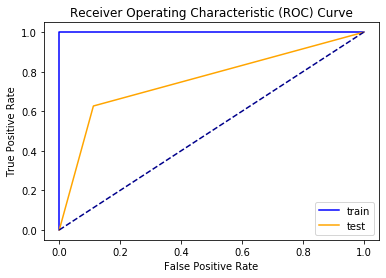

In [151]:
#roc curve
y_pred2 = rf_clf.predict(X_train_tree)
fper, tper, thresholds = metrics.roc_curve(y_test, y_pred_rf_2)
fper2, tper2 , thresholds2 =  metrics.roc_curve(y_train, y_pred2)
plot_roc_cur(fper, tper,fper2, tper2)

Comparing the previous models:

In [152]:
print (comparison)

          reg_pca  svm_all_var  decision_tree_default  random_forest
accuracy    0.792        0.818                  0.792          0.797
error       0.208        0.182                  0.208          0.203
recall      0.537        0.627                  0.642          0.627
AUC         0.733        0.773                  0.757          0.757


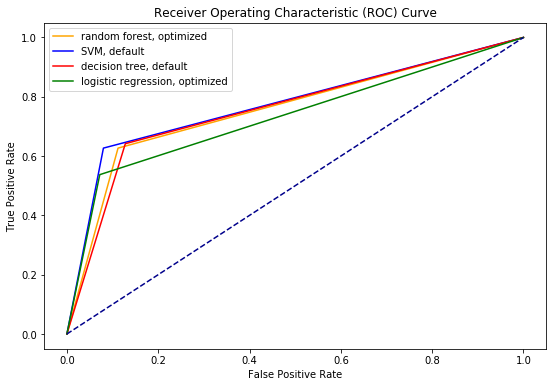

In [156]:
#roc curve superposed
fper1, tper1, thresholds = metrics.roc_curve(y_test, y_pred_rf_2)
fper2, tper2, thresholds = metrics.roc_curve(y_test, y_pred_svm_all)
fper3, tper3, thresholds = metrics.roc_curve(y_test, y_pred_tree_1)
fper4, tper4, thresholds = metrics.roc_curve(y_test, y_pred_reg_pca)

plt.figure(figsize=(9,6))
plt.plot(fper1, tper1, color='orange', label='random forest, optimized')
plt.plot(fper2, tper2, color='blue', label='SVM, default')
plt.plot(fper3, tper3, color='red', label='decision tree, default')
plt.plot(fper4, tper4, color='green', label='logistic regression, optimized')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Conclusion : the best results were returned by the SVM model, using all 8 variables in the databases with default parameters.